In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
base_dir = 'data/'

train = pd.read_csv(base_dir + 'DBAASP/multi_train_35_0.8.csv')
test = pd.read_csv(base_dir + 'DBAASP/multi_test_35_0.8.csv')
val = pd.read_csv(base_dir + 'DBAASP/multi_val_35_0.8.csv')

df = pd.concat([train, test, val]).reset_index(drop=True)
df

,sequence,label,species
0,GIAAGIIIKIKK,1.505150,Escherichia coli
1,VDKKPYRPRPRPPRRIYNR,-0.853976,Escherichia coli
2,ACDTATCVTHRLAGLLSRSGGVVKNNFVPTNVGSKAF,-0.256684,Escherichia coli
3,GWWRRTVAKVRNAGRK,0.491362,Escherichia coli
4,FLGVVFKSASKVFPAVFGKV,2.080356,Escherichia coli
...,...,...,...
36813,RVRRFWPLVPVAINTVAAGINLYKAIRRK,-0.154902,Staphylococcus haemolyticus
36814,GLVTSLIKGAGKLLGGLFGSVTG,0.795880,Staphylococcus haemolyticus
36815,EDWNHLGAAVHTLKHVYK,1.781212,Staphylococcus haemolyticus
36816,GLVTGLLKTAGKLLGDLFGSLSG,1.397940,Staphylococcus haemolyticus


In [64]:
gram_positive = ['Staphylococcus aureus',
'Bacillus subtilis',
'Staphylococcus epidermidis',
'Enterococcus faecalis',
'Micrococcus luteus',
'Listeria monocytogenes',
'Bacillus cereus',
'Enterococcus faecium',
'Streptococcus mutans',
'Streptococcus pyogenes',
'Bacillus megaterium',
'Streptococcus pneumoniae',
'Streptococcus agalactiae',
'Listeria innocua',
'Lactococcus lactis',
'Staphylococcus haemolyticus',]

gram_negative = ['Escherichia coli',
'Pseudomonas aeruginosa',
'Salmonella enterica',
'Klebsiella pneumoniae',
'Acinetobacter baumannii',
'Enterobacter cloacae',
'Pseudomonas syringae',
'Proteus mirabilis',
'Klebsiella aerogenes',
'Stenotrophomonas maltophilia',
'Serratia marcescens',
'Shigella dysenteriae',
'Proteus vulgaris',
'Aeromonas salmonicida',
'Vibrio parahaemolyticus',
'Aeromonas hydrophila',
'Pasteurella multocida',
'Klebsiella oxytoca',
'Pectobacterium carotovorum',]

In [65]:
def which_gram(x):
    if x in gram_positive:
        return 'positive'
    elif x in gram_negative:
        return 'negative'
    
df['gram'] = df.species.map(lambda x: which_gram(x))
df['length'] = df.sequence.map(lambda x: len(x))

In [66]:
df

,sequence,label,species,gram,length
0,GIAAGIIIKIKK,1.505150,Escherichia coli,negative,12
1,VDKKPYRPRPRPPRRIYNR,-0.853976,Escherichia coli,negative,19
2,ACDTATCVTHRLAGLLSRSGGVVKNNFVPTNVGSKAF,-0.256684,Escherichia coli,negative,37
3,GWWRRTVAKVRNAGRK,0.491362,Escherichia coli,negative,16
4,FLGVVFKSASKVFPAVFGKV,2.080356,Escherichia coli,negative,20
...,...,...,...,...,...
36813,RVRRFWPLVPVAINTVAAGINLYKAIRRK,-0.154902,Staphylococcus haemolyticus,positive,29
36814,GLVTSLIKGAGKLLGGLFGSVTG,0.795880,Staphylococcus haemolyticus,positive,23
36815,EDWNHLGAAVHTLKHVYK,1.781212,Staphylococcus haemolyticus,positive,18
36816,GLVTGLLKTAGKLLGDLFGSLSG,1.397940,Staphylococcus haemolyticus,positive,23


In [67]:
df_negative = df[df['gram'] =='negative'].reset_index(drop=True)
df_positive = df[df['gram'] =='positive'].reset_index(drop=True)

In [68]:
df_negative_active = df_negative[df_negative['label'] <= 1]
df_negative_inactive = df_negative[df_negative['label'] >=2]

df_positive_active = df_positive[df_positive['label'] <= 1]
df_positive_inactive = df_positive[df_positive['label'] >=2]

negative_seqs = set(df_negative_active.sequence).intersection(set(df_positive_inactive.sequence)) # Negative에 specific하게 active
positive_seqs = set(df_positive_active.sequence).intersection(set(df_negative_inactive.sequence)) # Positive에 specific하게 active

duplicated_seqs = negative_seqs.intersection(positive_seqs)

negative_seqs = negative_seqs - duplicated_seqs
positive_seqs = positive_seqs - duplicated_seqs

In [69]:
len(negative_seqs)

192

In [70]:
len(positive_seqs)

318

In [71]:
len(duplicated_seqs)

18

In [72]:
check = pd.read_csv('data/DBAASP/multi_species_median_35.csv').set_index('sequence')
check

,Escherichia coli,Staphylococcus aureus,Pseudomonas aeruginosa,Salmonella enterica,Bacillus subtilis,Klebsiella pneumoniae,Staphylococcus epidermidis,Acinetobacter baumannii,Enterococcus faecalis,Micrococcus luteus,...,Vibrio parahaemolyticus,Listeria innocua,Aeromonas hydrophila,Pasteurella multocida,Klebsiella oxytoca,Lactococcus lactis,Pectobacterium carotovorum,Staphylococcus haemolyticus,std,num_species
sequence,,,,,,,,,,,,,,,,,,,,,
GGHIRRIIRKIIHIIKKYG,0.602060,1.204120,1.20412,NaN,NaN,1.20412,NaN,0.90309,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.29597,6
AAAAAAAAAAGIGKFLHSAKKFGKAFVGEIMNS,2.099950,2.099950,2.09995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,3
AAAAAAAIKMLMDLVNERIMALNKKAKK,1.000000,1.301030,1.30103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.17380,3
AAAARRRR,2.140098,2.140098,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,2
AAARLRLLLYLITRR,1.852127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NPVSCVRNKGICVPIRCPGNMKQIGTCVGRAVKCCRKK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-0.252964,NaN,NaN,NaN,NaN,NaN,1
CAIEHMRTPLKPFSFGPPYNL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.544068,NaN,NaN,1
LEGRSISRIDELIQQRQEKD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.322219,NaN,NaN,1


In [89]:
gram_positive_inactive = set(check[gram_positive][check[gram_positive].mean(axis=1) >= 2].index)
gram_positive_active = set(check[gram_positive][check[gram_positive].mean(axis=1) <= 1].index)

In [90]:
gram_negative_inactive = set(check[gram_negative][check[gram_negative].mean(axis=1) >= 2].index)
gram_negative_active = set(check[gram_negative][check[gram_negative].mean(axis=1) <= 1].index)

In [93]:
negative_seqs = set(gram_negative_active).intersection(set(gram_positive_inactive)) # Negative에 specific하게 active
positive_seqs = set(gram_positive_active).intersection(set(gram_negative_inactive)) # Positive에 specific하게 active

duplicated_seqs = negative_seqs.intersection(positive_seqs)

negative_seqs = negative_seqs - duplicated_seqs
positive_seqs = positive_seqs - duplicated_seqs

In [95]:
len(negative_seqs)

51

In [96]:
len(positive_seqs)

62

In [101]:
check.loc[negative_seqs][gram_positive+gram_negative].to_csv('negative_specific.csv')

In [102]:
check.loc[positive_seqs][gram_positive+gram_negative].to_csv('positive_specific.csv')

In [105]:
positive_seq = list(positive_seqs)
negative_seq = list(negative_seqs)

ofile = open("2023.12.28/gram_positive.fasta", "w")

for i in range(len(positive_seqs)):
    ofile.write(">" + str(i) + "\n" +positive_seqs[i] + "\n")

#do not forget to close it
ofile.close()

ofile = open("2023.12.28/gram_negative.fasta", "w")

for i in range(len(negative_seqs)):
    ofile.write(">" + str(i) + "\n" +negative_seqs[i] + "\n")

#do not forget to close it
ofile.close()

# Length

In [106]:
positive_length = []
for i in positive_seq:
    positive_length.append(len(i))

negative_length = []
for i in negative_seq:
    negative_length.append(len(i))

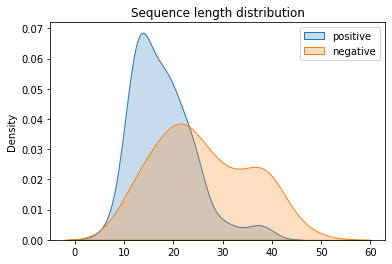

In [107]:
import seaborn as sns
sns.kdeplot(positive_length, label = 'positive', fill=True)
sns.kdeplot(negative_length, label = 'negative', fill=True)
plt.legend()
plt.title('Sequence length distribution')
plt.show()

In [108]:
from scipy import stats

stats.ranksums(positive_length, negative_length)

RanksumsResult(statistic=-4.5379111829186405, pvalue=5.681417787233948e-06)

# Secondary structure

positive, negative:  RanksumsResult(statistic=6.961207682379326, pvalue=3.3736798715318883e-12)


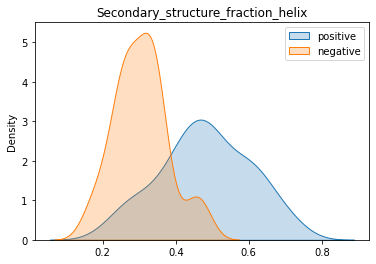

In [109]:
from Bio.Seq import Seq
from Bio.SeqUtils.ProtParam import ProteinAnalysis

df_positive_seq_feature = []
for seq in positive_seq:
    my_seq = ProteinAnalysis(seq)
    features = my_seq.secondary_structure_fraction() # [helix, turn, sheet]
    df_positive_seq_feature.append(features[0])
    
df_negative_seq_feature = []
for seq in negative_seq:
    my_seq = ProteinAnalysis(seq)
    features = my_seq.secondary_structure_fraction() # [helix, turn, sheet]
    df_negative_seq_feature.append(features[0])

print('positive, negative: ', stats.ranksums(df_positive_seq_feature, df_negative_seq_feature))

sns.kdeplot(df_positive_seq_feature, label = 'positive', fill=True)
sns.kdeplot(df_negative_seq_feature, label = 'negative', fill=True)
plt.legend()
plt.title('Secondary_structure_fraction_helix')
plt.show()

positive, negative:  RanksumsResult(statistic=0.020194137495505714, pvalue=0.9838885045342534)


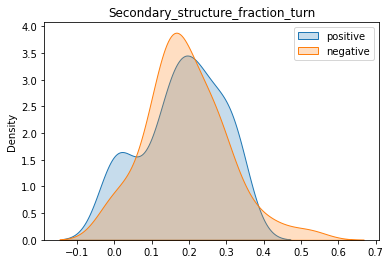

In [112]:
from Bio.Seq import Seq
from Bio.SeqUtils.ProtParam import ProteinAnalysis

df_positive_seq_feature = []
for seq in positive_seq:
    my_seq = ProteinAnalysis(seq)
    features = my_seq.secondary_structure_fraction() # [helix, turn, sheet]
    df_positive_seq_feature.append(features[1])
    
df_negative_seq_feature = []
for seq in negative_seq:
    my_seq = ProteinAnalysis(seq)
    features = my_seq.secondary_structure_fraction() # [helix, turn, sheet]
    df_negative_seq_feature.append(features[1])

print('positive, negative: ', stats.ranksums(df_positive_seq_feature, df_negative_seq_feature))

sns.kdeplot(df_positive_seq_feature, label = 'positive', fill=True)
sns.kdeplot(df_negative_seq_feature, label = 'negative', fill=True)
plt.legend()
plt.title('Secondary_structure_fraction_turn')
plt.show()

positive, negative:  RanksumsResult(statistic=3.4387731278061158, pvalue=0.0005843567320266041)


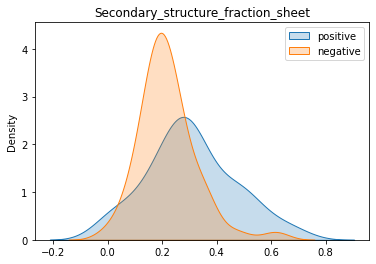

In [111]:
from Bio.Seq import Seq
from Bio.SeqUtils.ProtParam import ProteinAnalysis

df_positive_seq_feature = []
for seq in positive_seq:
    my_seq = ProteinAnalysis(seq)
    features = my_seq.secondary_structure_fraction() # [helix, turn, sheet]
    df_positive_seq_feature.append(features[2])
    
df_negative_seq_feature = []
for seq in negative_seq:
    my_seq = ProteinAnalysis(seq)
    features = my_seq.secondary_structure_fraction() # [helix, turn, sheet]
    df_negative_seq_feature.append(features[2])

print('positive, negative: ', stats.ranksums(df_positive_seq_feature, df_negative_seq_feature))

sns.kdeplot(df_positive_seq_feature, label = 'positive', fill=True)
sns.kdeplot(df_negative_seq_feature, label = 'negative', fill=True)
plt.legend()
plt.title('Secondary_structure_fraction_sheet')
plt.show()

# Gravy

positive, negative:  RanksumsResult(statistic=6.387117202149949, pvalue=1.6904208200561634e-10)


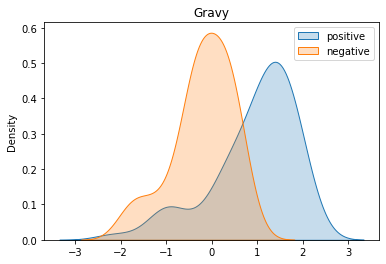

In [132]:
# Protein GRAVY returns the GRAVY (grand average of hydropathy) value for the protein sequences you enter. 
# The GRAVY value is calculated by adding the hydropathy value for each residue and dividing by the length of the sequence

df_positive_seq_feature = []
for seq in positive_seq:
    my_seq = ProteinAnalysis(seq)
    features = my_seq.gravy() # [helix, turn, sheet]
    df_positive_seq_feature.append(features)
    
df_negative_seq_feature = []
for seq in negative_seq:
    my_seq = ProteinAnalysis(seq)
    features = my_seq.gravy() # [helix, turn, sheet]
    df_negative_seq_feature.append(features)
    
    
print('positive, negative: ', stats.ranksums(df_positive_seq_feature, df_negative_seq_feature))
    
sns.kdeplot(df_positive_seq_feature, label = 'positive', fill=True)
sns.kdeplot(df_negative_seq_feature, label = 'negative', fill=True)
plt.legend()
plt.title('Gravy')
plt.show()

# N-mer

In [128]:
def count_mer(seq, mer_count, mers):
    for oligo in mers:
        mer_count[oligo] += seq.count(oligo)
    return mer_count

def get_features(seqs):
    amino_acid = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I','K','L','M','N','P','Q','R','S','T','V','W','Y']
    mers = amino_acid.copy()
    for i in amino_acid:
        for j in amino_acid:
            mers.append(i+j)
    for i in amino_acid:
        for j in amino_acid:
            for k in amino_acid:
                mers.append(i+j+k)
    
    mer_count = {}
    for mer in mers:
        mer_count[mer] = 0
    
    for seq in seqs:
        mer_count = count_mer(seq, mer_count, mers)
    df = pd.DataFrame({'mer': mer_count.keys(), 'num': mer_count.values()})
    df['mer_type'] = ['mer1'] * 20 + ['mer2'] * 400 + ['mer3'] * 8000
    return df

positive_comp_df = get_features(positive_seq)
negative_comp_df = get_features(negative_seq)

/home/qoeogns09/.local/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/qoeogns09/.local/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


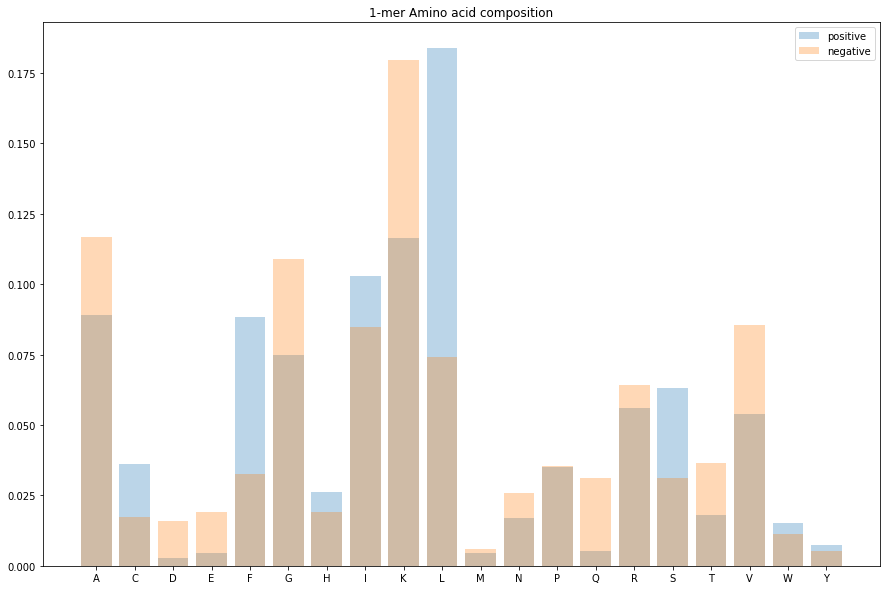

In [130]:
positive_composition = positive_comp_df[positive_comp_df['mer_type'] == 'mer1']
negative_composition = negative_comp_df[negative_comp_df['mer_type'] == 'mer1']


positive_composition['num'] = positive_composition['num'] / positive_composition['num'].sum()
negative_composition['num'] = negative_composition['num'] / negative_composition['num'].sum()


plt.figure(figsize=(15,10))
plt.bar(height = positive_composition.num, x=positive_composition.mer, label = 'positive', alpha=0.3)
plt.bar(height = negative_composition.num, x=negative_composition.mer, label = 'negative', alpha=0.3)
# plt.bar(height = duplicate_composition.num, x=duplicate_composition.mer, label = 'duplicated', alpha=0.3)
plt.legend()
plt.title('1-mer Amino acid composition')
plt.show()

# DBAASP property prediction

In [118]:
positive_df = pd.read_csv('2023.12.28/positive_property.txt', sep='\t')
negative_df = pd.read_csv('2023.12.28/negative_property.txt', sep='\t')

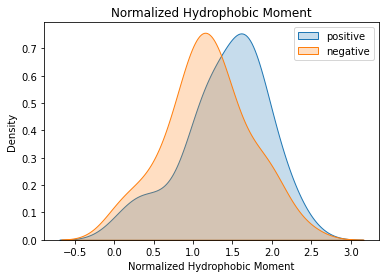

positive, negative:  RanksumsResult(statistic=2.478109158377058, pvalue=0.013208072964234738)


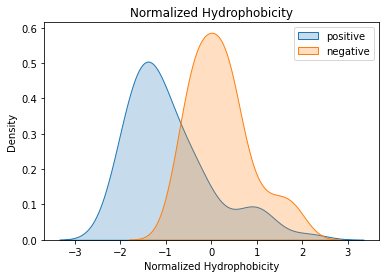

positive, negative:  RanksumsResult(statistic=-6.404426462860383, pvalue=1.5093567966981086e-10)


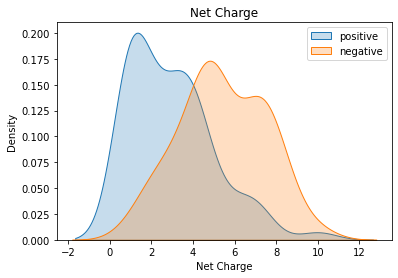

positive, negative:  RanksumsResult(statistic=-5.694746773732611, pvalue=1.2355516105420099e-08)


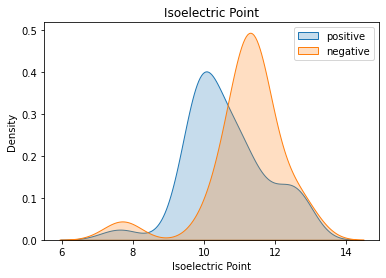

positive, negative:  RanksumsResult(statistic=-3.7676490813043513, pvalue=0.0001647921303636325)


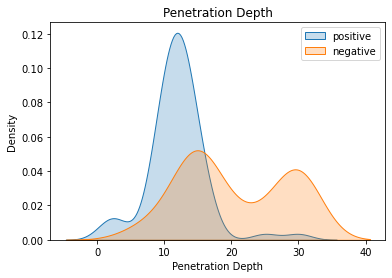

positive, negative:  RanksumsResult(statistic=-6.395771832505166, pvalue=1.5973838524863516e-10)


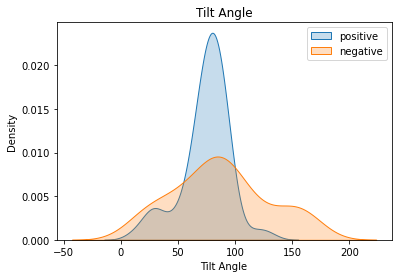

positive, negative:  RanksumsResult(statistic=-1.898248924577537, pvalue=0.057663298691146864)


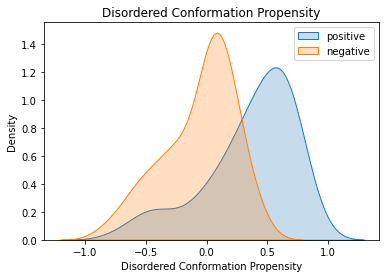

positive, negative:  RanksumsResult(statistic=6.01496809687563, pvalue=1.7992213079378265e-09)


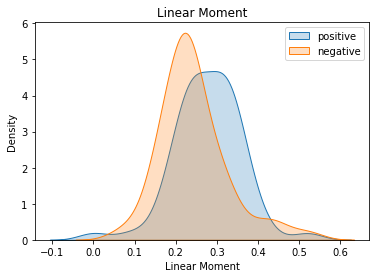

positive, negative:  RanksumsResult(statistic=3.0695088993168684, pvalue=0.0021441101767420497)


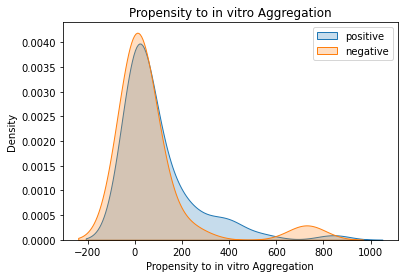

positive, negative:  RanksumsResult(statistic=2.3309804423383738, pvalue=0.019754390979886946)


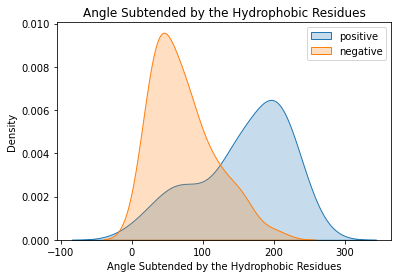

positive, negative:  RanksumsResult(statistic=6.196715334335181, pvalue=5.765363551611183e-10)


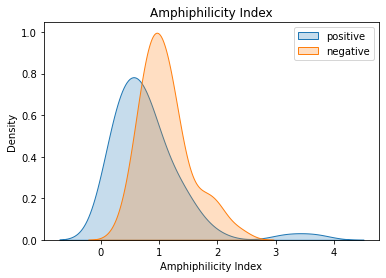

positive, negative:  RanksumsResult(statistic=-4.223459613345766, pvalue=2.4058049788780408e-05)


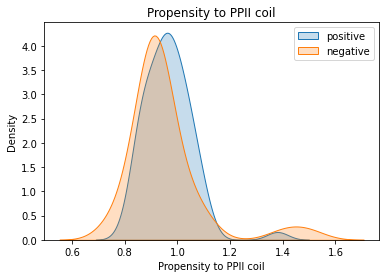

positive, negative:  RanksumsResult(statistic=1.9819103513446321, pvalue=0.047489275193989405)


In [121]:
for col in positive_df.columns[1:]:
    sns.kdeplot(positive_df[col], label = 'positive', fill=True)
    sns.kdeplot(negative_df[col], label = 'negative', fill=True)
#     sns.kdeplot(duplicate_df[col], label = 'duplicated', fill=True)
    plt.legend()
    plt.title(col)
    plt.show()
    print('positive, negative: ', stats.ranksums(positive_df[col], negative_df[col]))
#     print('positive, dup: ', stats.ranksums(positive_df[col], duplicate_df[col]))
#     print('negative, dup: ', stats.ranksums(negative_df[col], duplicate_df[col]))
#     print(stats.ranksums(positive_df[col], negative_df[col]))

In [122]:
from sklearn.preprocessing import StandardScaler

positive_df = pd.read_csv('2023.12.28/positive_property.txt', sep='\t')
negative_df = pd.read_csv('2023.12.28/negative_property.txt', sep='\t')
positive_df = positive_df.drop(columns = ['ID'])
negative_df = negative_df.drop(columns = ['ID'])


# gram_np = ['positive'] * len(positive_df) + ['negative'] * len(negative_df)
# features = np.array(pd.concat([positive_df, negative_df]))

gram_np = ['positive'] * len(positive_df) + ['negative'] * len(negative_df)
features = np.array(pd.concat([positive_df, negative_df]))

scaler = StandardScaler()
features = scaler.fit_transform(features)

/usr/local/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


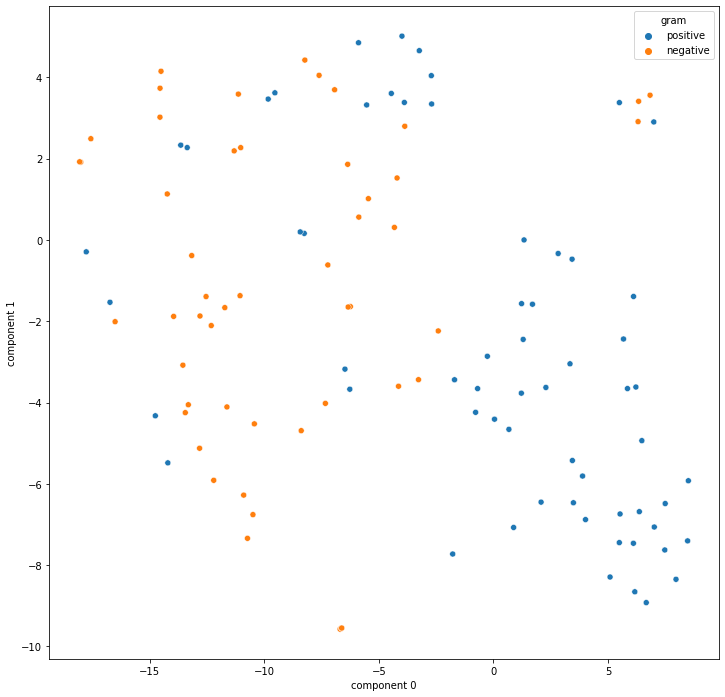

In [126]:
from sklearn.manifold import TSNE


tsne_np = TSNE(n_components = 2, random_state=42, perplexity=20).fit_transform(features)
tsne_df = pd.DataFrame(tsne_np, columns = ['component 0', 'component 1'])

tsne_df['gram'] = gram_np

plt.figure(figsize=(12, 12))
sns.scatterplot(data=tsne_df, x="component 0", y="component 1", hue="gram")
plt.show()

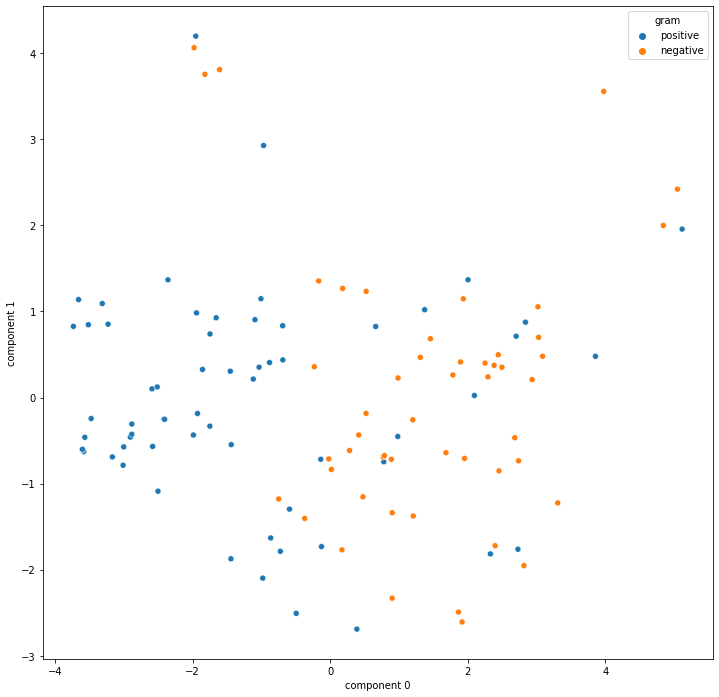

In [124]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca_np = pca.fit_transform(features)
pca_df = pd.DataFrame(pca_np, columns = ['component 0', 'component 1'])

pca_df['gram'] = gram_np

plt.figure(figsize=(12, 12))
sns.scatterplot(data=pca_df, x="component 0", y="component 1", hue="gram")
plt.show()

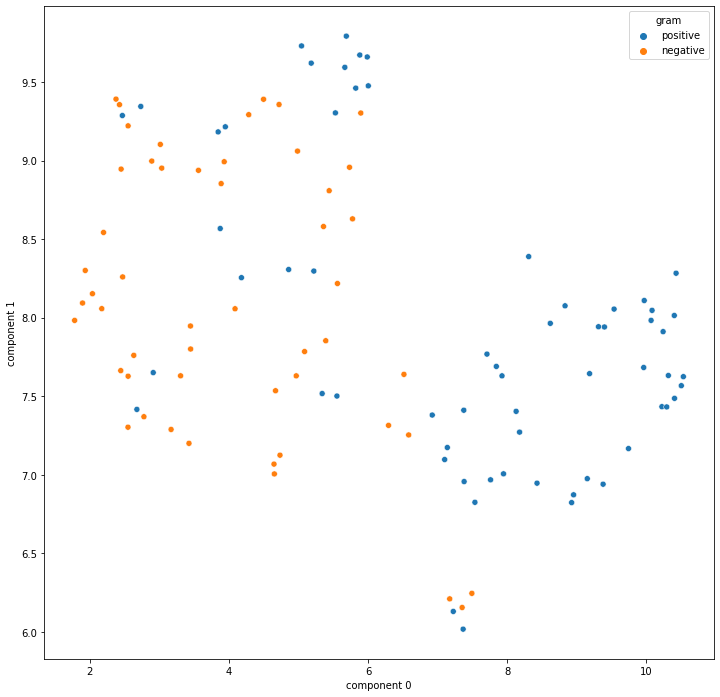

In [127]:
from umap import UMAP

model = UMAP(n_components=2, init='random', random_state=0)
# model = PCA()
X_embedded = model.fit_transform(features)
u_map_df = pd.DataFrame(X_embedded, columns = ['component 0', 'component 1'])

u_map_df['gram'] = gram_np

plt.figure(figsize=(12, 12))
sns.scatterplot(data=u_map_df, x="component 0", y="component 1", hue="gram")
plt.show()